## Importing Requirements

In [160]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model
import random
from PIL import Image
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from random import shuffle
from collections import defaultdict

## Data

In [161]:
classes = ['no_tumor','pituitary_tumor','meningioma_tumor','glioma_tumor']

In [162]:
xtrain = []
ytrain =[]
image_size = 150

for i in classes:
    folderpath = os.path.join('../Downloads/Brain Tumor Classification','Training', i)
    
    for j in tqdm(os.listdir(folderpath)):
        img = cv2.imread(os.path.join(folderpath,j))
        img = cv2.resize(img,(image_size, image_size))
        xtrain.append(img)
        ytrain.append(i)
        
for i in classes:
    folderpath = os.path.join('../Downloads/Brain Tumor Classification','Testing', i)
    
    for j in tqdm(os.listdir(folderpath)):
        img = cv2.imread(os.path.join(folderpath,j))
        img = cv2.resize(img,(image_size, image_size))
        xtrain.append(img)
        ytrain.append(i)
        
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

  0%|          | 0/395 [00:00<?, ?it/s]

  0%|          | 0/827 [00:00<?, ?it/s]

  0%|          | 0/822 [00:00<?, ?it/s]

  0%|          | 0/826 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

## Visualising data

In [171]:
from collections import Counter

In [172]:
class_counts = Counter(ytrain)

In [173]:
classes = list(class_counts.keys())
counts = list(class_counts.values())

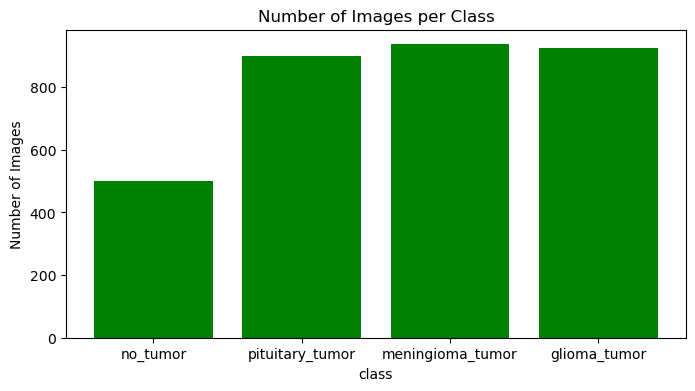

In [179]:
plt.figure(figsize=(8,4))
plt.bar(classes, counts, color='Green')
plt.xlabel('class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(classes)
plt.show()

## Displaying data

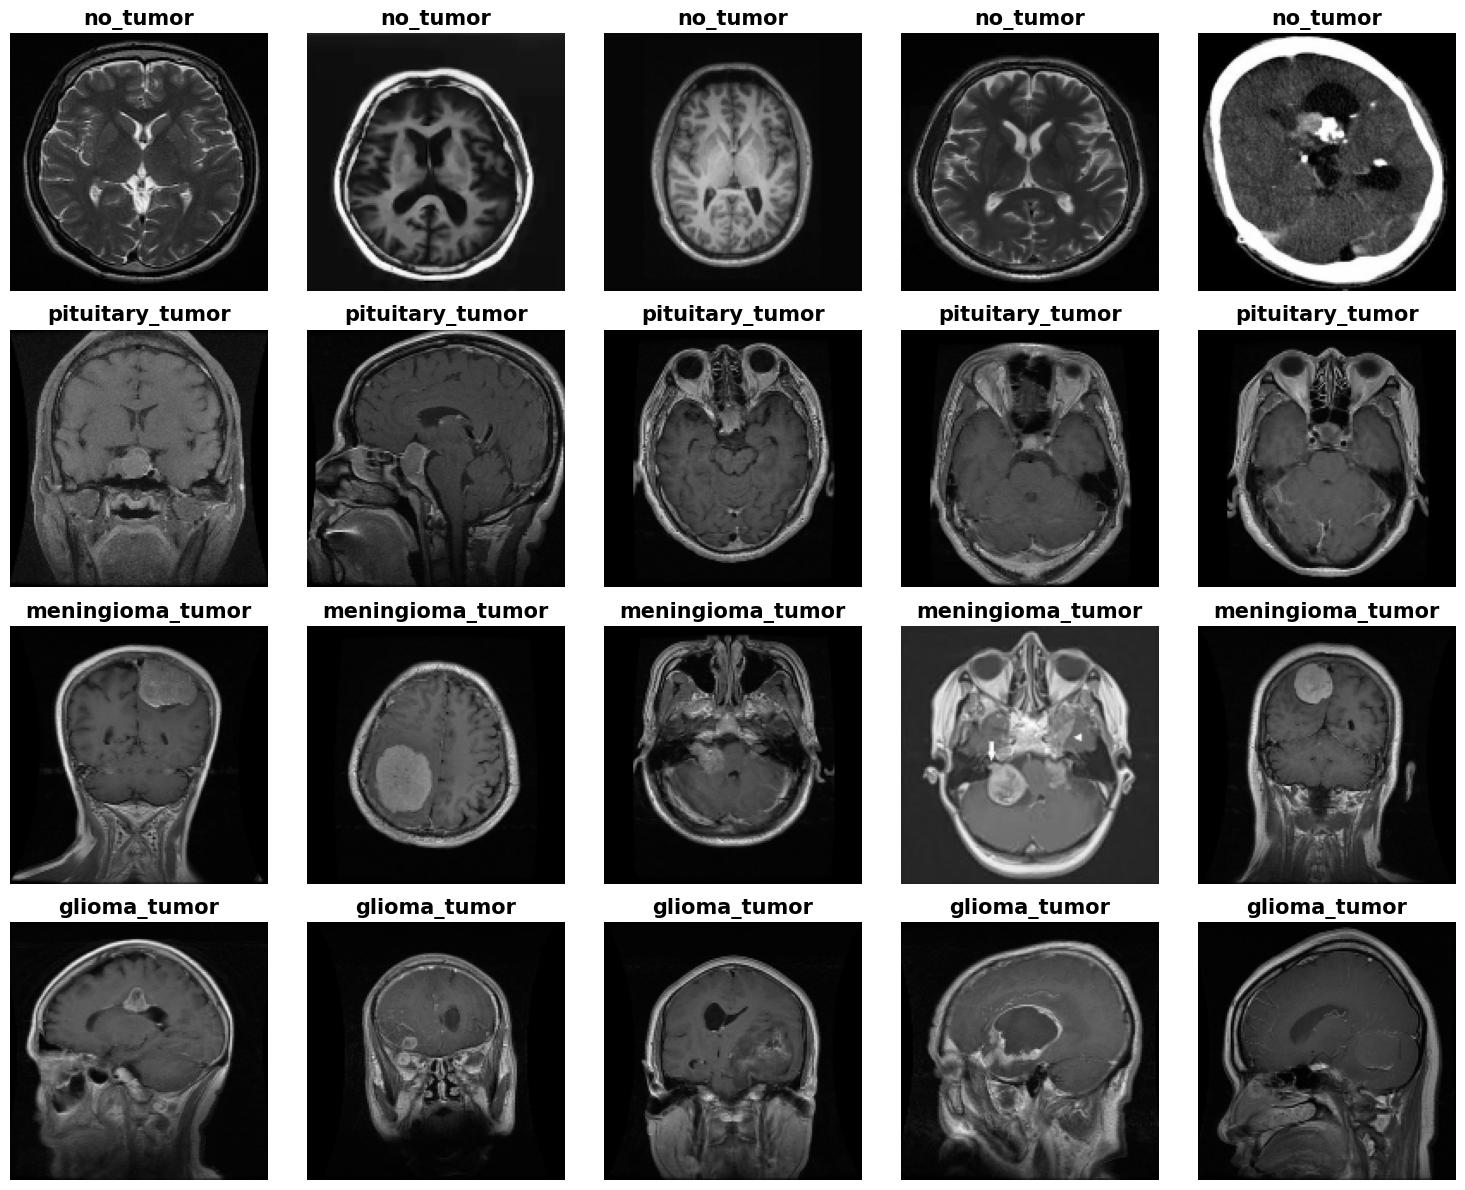

In [135]:
class_img = defaultdict(list)

for image, label in zip(xtrain,ytrain):
    class_img[label].append(image)
    
selected = {label: random.sample(images, 5) for label,images in class_img.items()}

fig, axes = plt.subplots(len(selected), 5, figsize=(15, 3*len(selected)))

for class_idx, (label, images) in enumerate(selected.items()):
    for img_idx, image in enumerate(images):
        ax = axes[class_idx, img_idx]
        ax.imshow(image)
        ax.set_title(f'{label}',fontsize = 15, fontweight = 'bold')
        ax.axis('off')
        
plt.tight_layout()
plt.show()

In [136]:
indices = np.arange(len(xtrain))
np.random.shuffle(indices)

xtrain = xtrain[indices]
ytrain = ytrain[indices]

In [137]:
xtrain.shape

(3264, 150, 150, 3)

## Splitting

In [138]:
xtrain, xtest,ytrain,ytest = train_test_split(xtrain,ytrain, test_size=0.1, random_state = True)

## Training model

In [139]:
class_to_index = {'no_tumor': 0, 'pituitary_tumor': 1, 'meningioma_tumor': 2, 'glioma_tumor': 3}

In [140]:
ytrain_new = [class_to_index[label] for label in ytrain]
ytest_new = [class_to_index[label] for label in ytest]

In [141]:
ytrain = tf.keras.utils.to_categorical(ytrain_new, num_classes=len(classes))
ytest = tf.keras.utils.to_categorical(ytest_new, num_classes=len(classes))

In [142]:
from tensorflow.keras.applications import  EfficientNetB0

In [143]:
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

In [144]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4, activation = 'softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)


In [145]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_6 (Rescaling)       │ (None, 150, 150, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_3               │ (None, 150, 150, 3)       │               7 │ rescaling_6[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_7 (Rescaling)       │ (None, 150, 150, 3)       │               0 │ normalization_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 151, 151, 3)       │               0 │ rescaling_7[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 75, 75, 32)        │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 75, 75, 32)        │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 75, 75, 32)        │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 75, 75, 32)        │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 75, 75, 32)        │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 75, 75, 32)        │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [146]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [147]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [148]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5.keras", monitor = "val_accuracy", save_best_only = True, mode = "auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode = 'auto', verbose = 1)

In [149]:
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs = 12, verbose = 1, batch_size = 32, callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7483 - loss: 0.6574
Epoch 1: val_accuracy improved from -inf to 0.80612, saving model to effnet.h5.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 353s 3s/step - accuracy: 0.7493 - loss: 0.6552 - val_accuracy: 0.8061 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9225 - loss: 0.2398
Epoch 2: val_accuracy improved from 0.80612 to 0.82313, saving model to effnet.h5.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9226 - loss: 0.2396 - val_accuracy: 0.8231 - val_loss: 0.5413 - learning_rate: 0.0010
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9768 - loss: 0.0865
Epoch 3: val_accuracy did not improve from 0.82313
83/83 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.9767 - loss: 0.0868 - val_accuracy: 0.7585 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 4/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9622 - loss: 0.1014
Epoch 4: val_accuracy im

In [151]:
#model.save('Brain tumor classification best.h5')

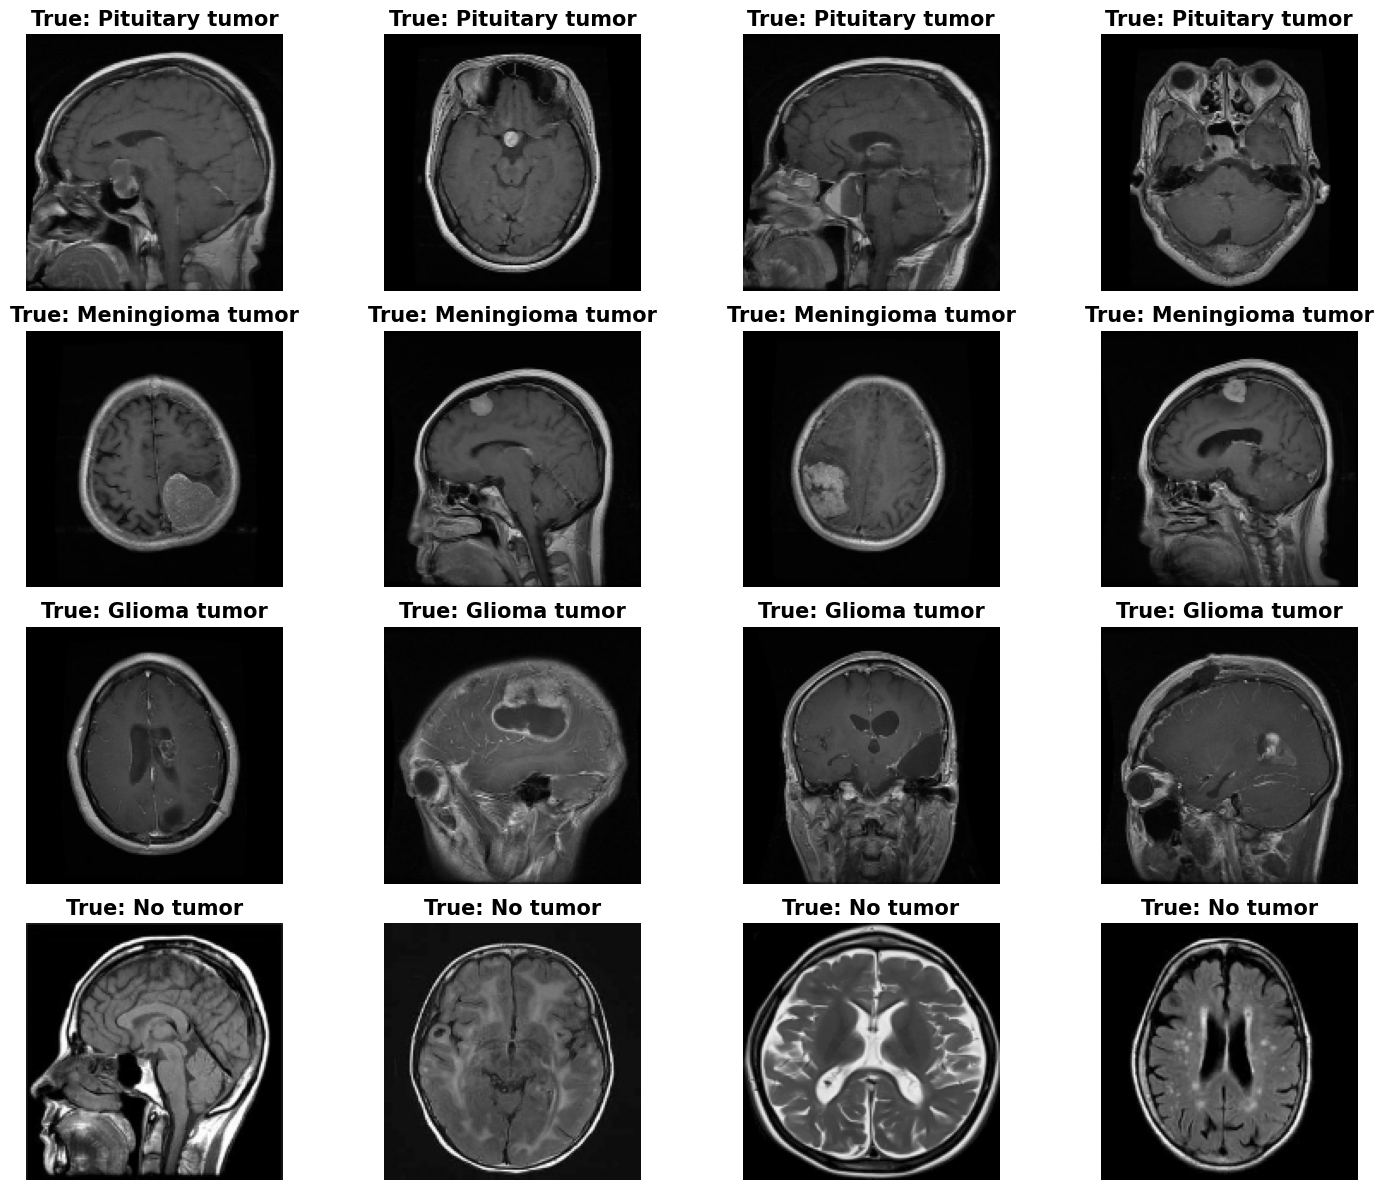

In [180]:
# Plotting images with true labels before predicting
class_img = defaultdict(list)
ytestn = np.argmax(ytest,axis=1)
for image, label in zip(xtest,ytestn):
    class_img[label].append(image)
    
selected = {label: images[:4] for label,images in class_img.items()}

fig, axes = plt.subplots(len(selected), 4, figsize=(15, 3*len(selected)))

for class_idx, (label, images) in enumerate(selected.items()):
    for img_idx, image in enumerate(images):
        ax = axes[class_idx, img_idx]
        ax.imshow(image)
        if label==0:
            label = "No tumor"
        elif label==1:
            label = "Pituitary tumor"
        elif label==2:
            label = "Meningioma tumor"
        elif label==3:
            label = "Glioma tumor"   
        ax.set_title(f'True: {label}',fontsize = 15, fontweight = 'bold')
        ax.axis('off')
        
plt.tight_layout()
plt.show()

## Predicting

In [181]:
pred = model.predict(xtest)
prd = np.argmax(pred, axis =1)
ytest_new = np.argmax(ytest, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step


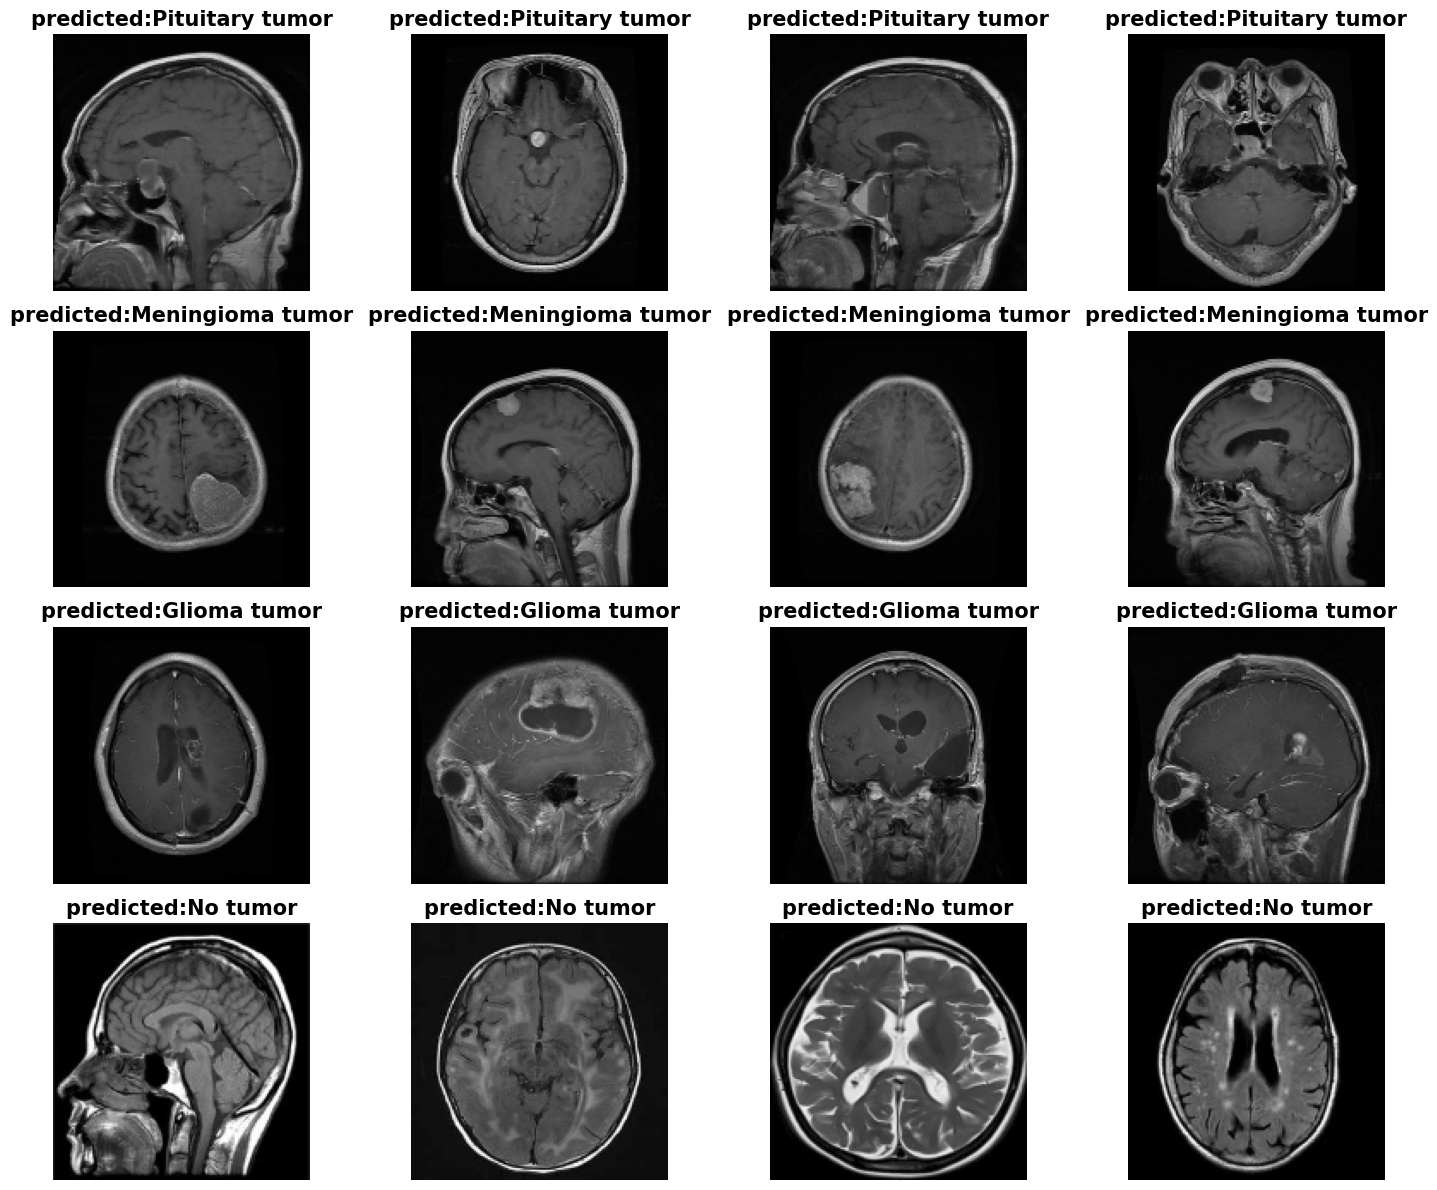

In [182]:
# plotting same images as above with predicted labels
class_img = defaultdict(list)

for image, label in zip(xtest,prd):
    class_img[label].append(image)
    
selected = {label: images[:4] for label,images in class_img.items()}

fig, axes = plt.subplots(len(selected), 4, figsize=(15, 3*len(selected)))

for class_idx, (label, images) in enumerate(selected.items()):
    for img_idx, image in enumerate(images):
        ax = axes[class_idx, img_idx]
        ax.imshow(image)
        if label==0:
            label = "No tumor"
        elif label==1:
            label = "Pituitary tumor"
        elif label==2:
            label = "Meningioma tumor"
        elif label==3:
            label = "Glioma tumor"   
        ax.set_title(f'predicted:{label}',fontsize = 15, fontweight = 'bold')
        ax.axis('off')
        
plt.tight_layout()
plt.show()

In [183]:
#img_path = "C:/Users/hally/Downloads/brain mri.jpeg"
def predict(img_path):
    image = Image.open(img_path)
    image = image.resize((150,150))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)
    predi = model.predict(image)
    predic = np.argmax(predi)
    print(predic)

predict("C:/Users/hally/Downloads/brain mri.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
0


In [184]:
predict("C:/Users/hally/Downloads/brain mri2.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1


In [185]:
predict("C:/Users/hally/Downloads/brain mri3.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2


In [186]:
predict( "C:/Users/hally/Downloads/brain mri4.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3


## Checking accuracy

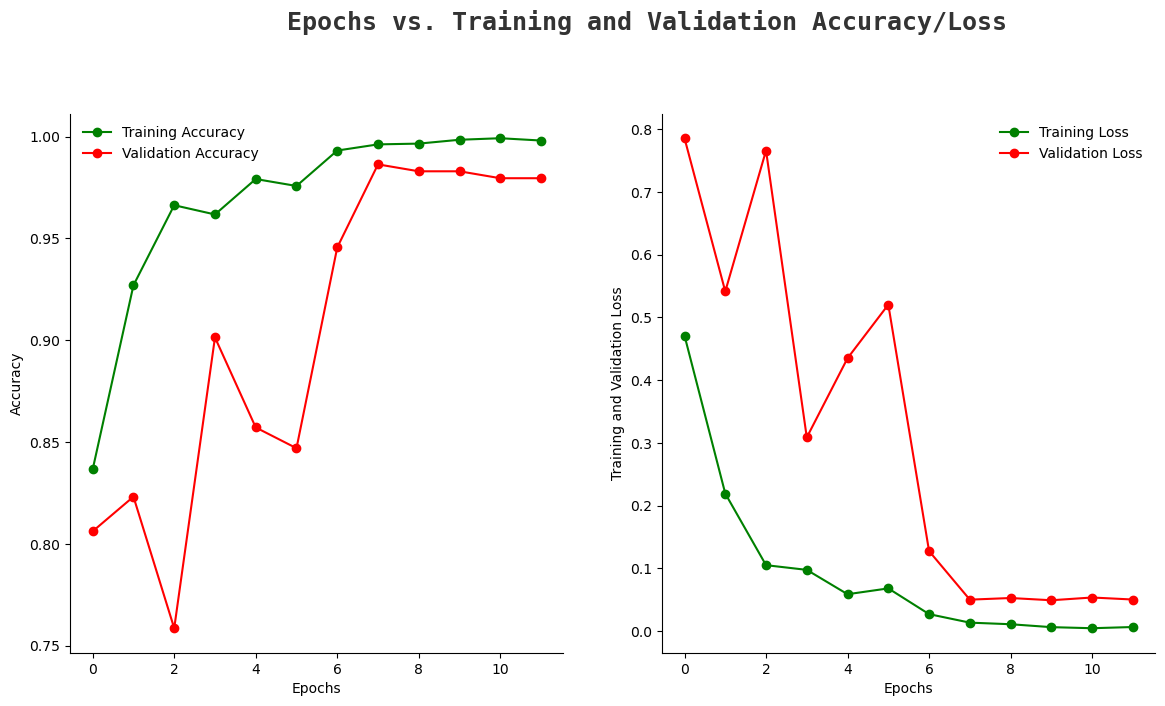

In [187]:
import warnings 
warnings.filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss', size = 18, fontweight = 'bold', fontname = 'monospace', color = 'black', y=1, x=0.28, alpha = 0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor= 'green', color='green', label='Training Accuracy')
ax[0].plot(epochs,val_acc, marker='o', markerfacecolor = 'red', color = 'red', label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker= 'o', markerfacecolor='green', color='green',label = 'Training Loss')
ax[1].plot(epochs, val_loss, marker= 'o', markerfacecolor = 'red', color = 'red', label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training and Validation Loss')

fig.show()

In [188]:
from sklearn.metrics import classification_report, confusion_matrix

In [189]:
prd[:5]

array([1, 2, 2, 2, 2], dtype=int64)

In [190]:
ytest[:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [191]:
ytest_new[:5]

array([1, 2, 2, 2, 2], dtype=int64)

### Classification Report

In [192]:
print(classification_report(ytest_new, prd))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.96      1.00      0.98        77
           2       0.97      0.97      0.97       118
           3       0.98      0.94      0.96        86

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



### Confusion Matrix

In [193]:
print(confusion_matrix(ytest_new, prd))

[[ 45   0   0   1]
 [  0  77   0   0]
 [  0   3 114   1]
 [  1   0   4  81]]


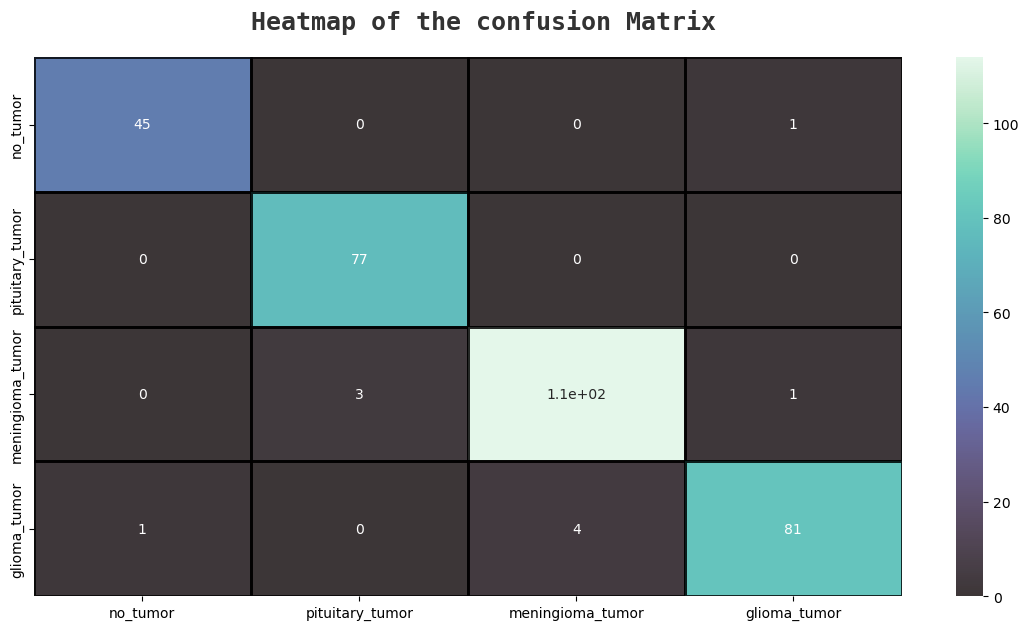

In [194]:
fig,ax = plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(ytest_new,prd), ax = ax, xticklabels=classes,yticklabels=classes, annot = True, cmap='mako', alpha=0.8,linewidths=2,linecolor='black')
fig.text(s='Heatmap of the confusion Matrix', size=18, fontweight = 'bold', fontname = 'monospace',color = 'black',y = 0.92, x=0.28, alpha=0.8)

plt.show()